<a href="https://colab.research.google.com/github/seohyeon-lee-2025/network_of_rings/blob/main/network_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import os
import string
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from networkx.algorithms import community
import community as community_louvain

from matplotlib.pyplot import  text
import matplotlib.patheffects as PathEffects
import re

import math

# try:
#     import pygraphviz
#     from networkx.drawing.nx_agraph import graphviz_layout
# except ImportError:
#     try:
#         import pydot
#         from networkx.drawing.nx_pydot import graphviz_layout
#     except ImportError:
#         raise ImportError("This example needs Graphviz and either "
#                           "PyGraphviz or pydot")

In [30]:
'''
  get list of main characters of LOTR
    char_list = []
    create dictionary with main character names as keys
    create subdictionary for each 
    parse text. 
    if word in char_list:
      pick out the sentence. 
      add all other names (if any) in the same sentence as keys to subdictionary. 
      if a name is already in the subdictionary, value++
      else, subdict[name] = 1
    
    use this dictionary to create and define edges below

'''

#kaggle dataset of Lord of the Rings characters
characters_df = pd.read_csv('./lotr_characters.csv')
#clean list of characters 
char_list = characters_df.name
char_list_fname = char_list.map(lambda x: x.split(" ")[0])
char_set = set(char_list_fname)

#set supports faster in operation
char_set.add("Moth")
char_set.add("King-of-the-Dead")
# char_list_simple = ["Sauron", "Treebeard", "Arwen", "Galadriel", "Elrond", "Merry", "Gimli", "Pippin", "Grima", "Theoden", "Eowyn", "Frodo", "Legolas", "Bilbo", "Samwise", "Saruman", "Gollum", "Aragorn", "Gandalf", "Goldberry", "Beorn"]
# char_set_simple = set(char_list_simple)

#character names that start with "The" or "in"
#remove things that are not character names
char_set.remove("The")
char_set.remove("in")

In [31]:
#810 characters in char_set
len(char_set)

808

In [32]:
def parseText(directory):
    text_dict = {}
    for filename in os.listdir(directory):
        with open(os.path.join(directory, filename), 'r', encoding = "ISO-8859-1") as f:
            book_lines = []
            while True:
                line = f.readline()
                book_lines.append(line.strip())
                if not line:
                    break
            text_dict[filename] = book_lines  
    return text_dict

In [33]:
# print(parseText("data").keys())
text_dict = parseText("data")

In [34]:
for key, val in text_dict.items():
    print(len(text_dict[key]))

3267
2642
4270


In [35]:

from itertools import combinations
def uniquePairs(item_set):
    pairs = list(combinations(item_set, 2))
    # print(pairs)
    return pairs

In [36]:
#assumption: if 2 characters get mentioned in the same line, they must have had an interaction. 
def getCharacterInteraction(dict_name, book_lines, characters):
  # book_lines: list of strings
  # characters: set of characters
  network_d = {}
# initialize network dictionary with character names. values are dictionaries on their own
  for item in characters:
      network_d[item] = {}

  # print(network_d)
  nonempty_count = 0
  for line in book_lines:
      if (len(line) > 0):
      # get rid of punctuation marks
        line = line.translate(str.maketrans('', '', string.punctuation))
        # break line down into set of words
        line_set = set(line.split(" "))
        # take intersection of character list and words in line -> get characters mentioned in line
        intersection = line_set.intersection(characters)
#if 2 or more characters are mentioned together in one line
      if (len(intersection) >1):
       # nonempty_count += 1
       # print(intersection)
        #loop through intersection: for all characters mentioned
        pairs = uniquePairs(intersection)
        for item in pairs:
           word1 = item[0]
           word2 = item[1]
           if word1 != word2:
              #if we did [frodo][bilbo] then we shouldn't create [bilbo][frodo]
              if word1 not in network_d[word2].keys(): 
                #if network_d[word][subitem] already exists increment the value 
                if word2 in network_d[word1].keys():
                  network_d[word1][word2] += 1
                  #else create entry and initialize value as 1
                else: network_d[word1][word2]=1
  return dict_name, network_d


In [37]:
network_d_list = []
for key, val in text_dict.items():
    # print(key)
    key, d = getCharacterInteraction(key, text_dict[key], char_set)
    # print(d['Frodo'])
    network_d_list.append((key, d))

In [38]:
G_list = []
for key, d in network_d_list:
    print(key)
    # val_list = []
    # for key in d.keys():
    #     for subkey in d[key]:
    #         print(key, subkey, d[key][subkey])
    #         val_list.append(d[key][subkey])

    G = nx.Graph()

    #loop through network_d and add edges w weight
    for item in d.keys():
        for sub in d[item]:
            G.add_edge(item, sub, weight = d[item][sub])

    G_list.append((key, G))

#sort G_list by key
G_list.sort(key=lambda x: x[0])
print(G_list)
    

book2.txt
book3.txt
book1.txt
[('book1.txt', <networkx.classes.graph.Graph object at 0x12f1e3e90>), ('book2.txt', <networkx.classes.graph.Graph object at 0x12f1e50d0>), ('book3.txt', <networkx.classes.graph.Graph object at 0x147f0bd50>)]


In [39]:
# #histogram of distribution of edge weights
# plt.boxplot(x = val_list)

# #810 -> 796
# print(len(val_list))

# print(len([x for x in val_list if x==1]))

# #median weight = 1 
# #412 are exactly 1

# np.median(val_list)

[4, 25, 22, 8, 42, 2, 2, 31, 41, 15, 77, 18, 19, 7, 8, 5, 5, 5, 36, 7, 1, 24, 44, 10, 6, 41, 6, 4, 12, 9, 20, 8, 29, 34, 11, 9, 6, 11, 10, 14, 6, 19, 6, 6, 6, 6, 6, 6, 3, 5, 25, 45, 30, 12, 3, 9, 8, 13, 12, 5, 12, 3, 4, 1, 13, 7, 31, 9, 14, 2, 3, 5, 4, 2, 14, 10, 6, 6, 3, 2, 2, 3, 6, 6, 3, 3, 2, 2, 2, 3, 4, 4, 6, 7, 12, 8, 8, 3, 28, 2, 13, 1, 7, 7, 3, 4, 1, 3, 1, 1, 1, 2, 6]


{'whiskers': [<matplotlib.lines.Line2D at 0x1699b1910>,
 'caps': [<matplotlib.lines.Line2D at 0x1699b2d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x147dcd490>],
 'medians': [<matplotlib.lines.Line2D at 0x1699b3cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1699b8550>],
 'means': []}

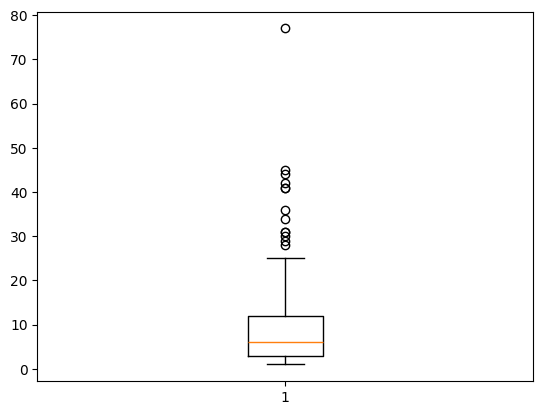

In [40]:
#box distribution of node degrees
deg_list = [G.degree[v] for v in G.nodes]
print([G.degree[v] for v in G.nodes]) # omits 0's

#plt.hist(x = deg_list)
plt.boxplot(x = deg_list)

In [41]:
def idxToTitle(idx): # 1-index
    title_list = ["The Fellowship of the Ring", "The Two Towers", "The Return of the King"]
    title = title_list[idx]
    return title

In [15]:
try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either "
                          "PyGraphviz or pydot")

ImportError: This example needs Graphviz and either PyGraphviz or pydot

In [54]:
import random
def assign_colors_to_partitions(graph, partitions):
    color_map = {}
    available_colors = list(range(256))  # A list of available colors (e.g., using 256 colors)

    for i, partition in enumerate(partitions):
        color = random.choice(available_colors)  # Choose a random color for the partition
        available_colors.remove(color)  # Remove the chosen color from the available colors
        for node in partition:
            color_map[node] = color

    # Now, color_map contains a mapping of nodes to their assigned colors
    return color_map

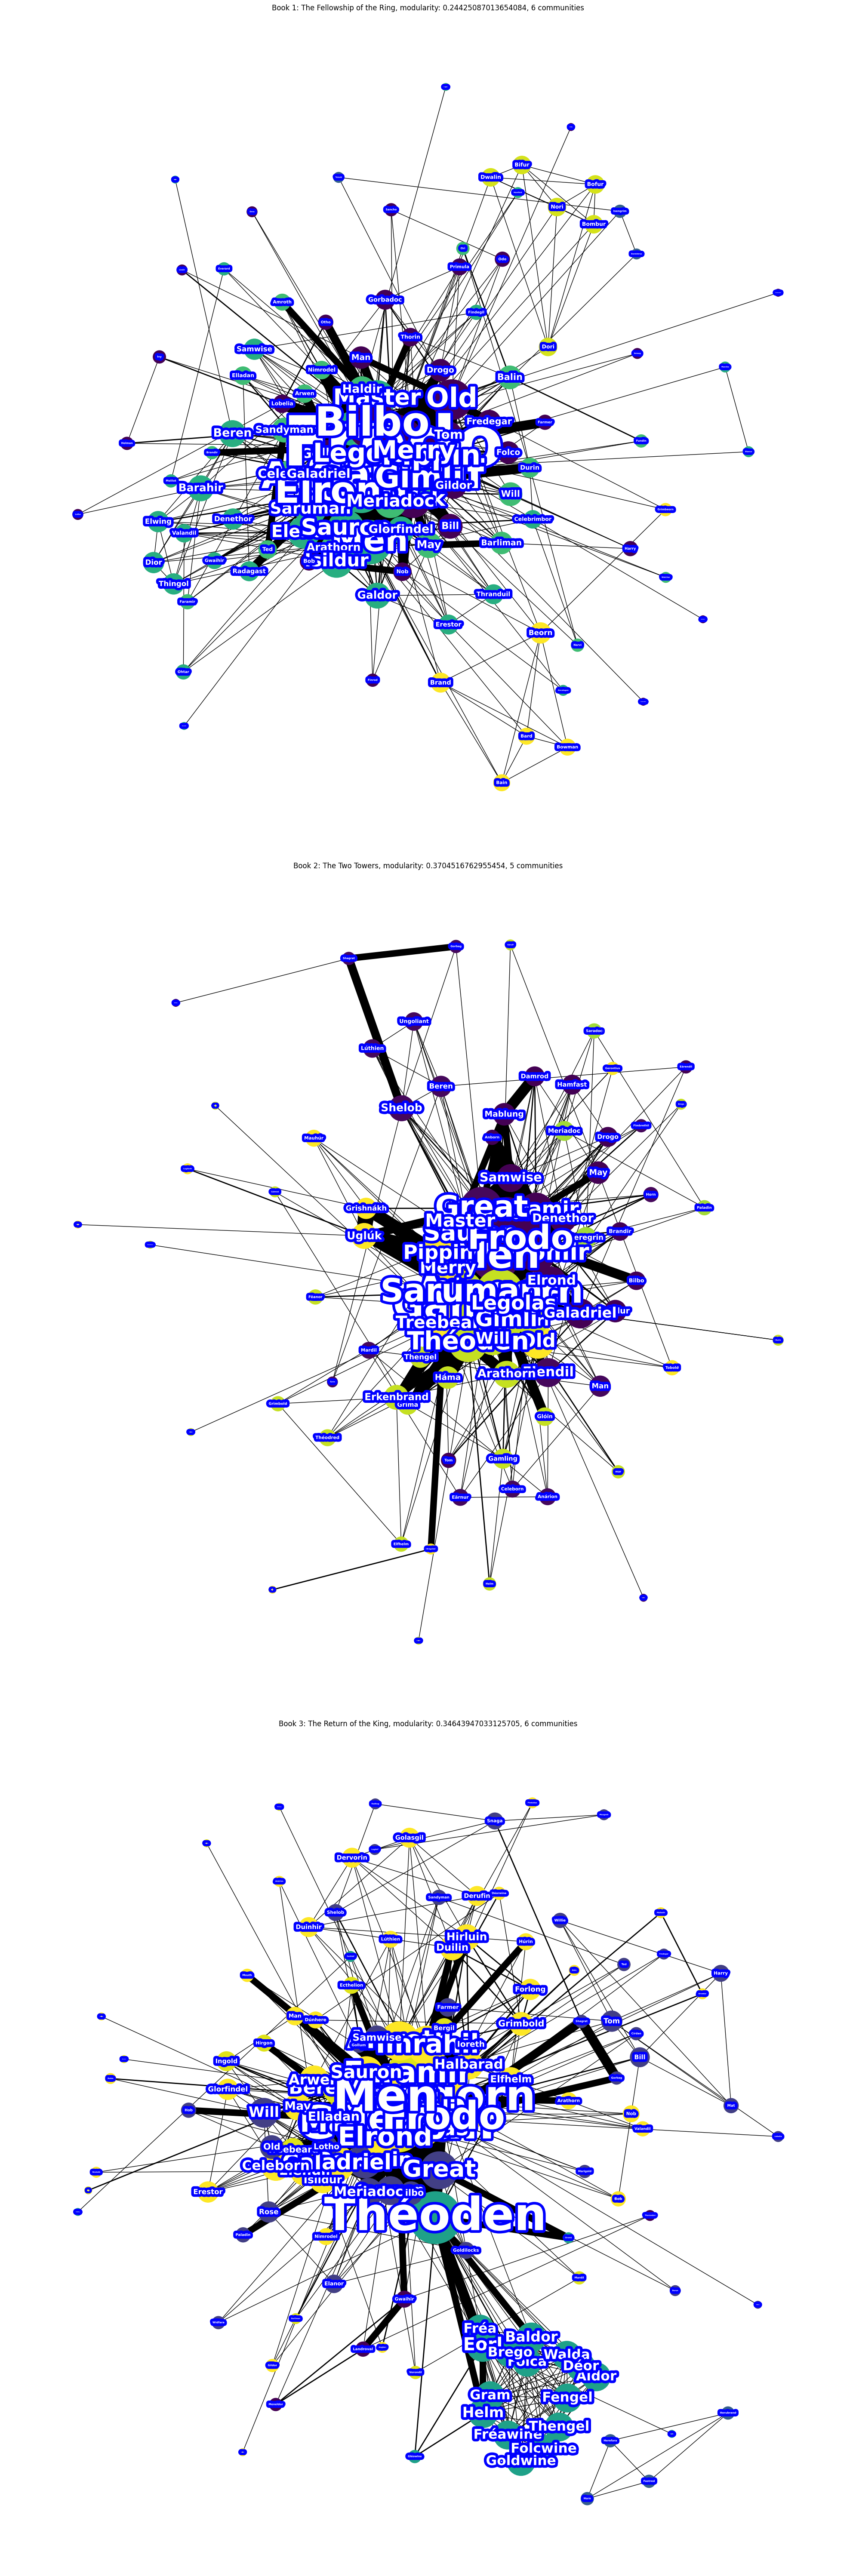

In [66]:


#visualization
fig, axs = plt.subplots(3, 1, figsize=(20, 60))
fig.tight_layout()
# fig.suptitle('Network of Rings', fontweight="bold", fontsize=16)

for key, G in G_list:
    idx = int(re.findall(r'\d+', key)[0])-1
   

    #set image dimensions and quality
   # plt.subplot(3, 1, int(idx))
    # plt.title.set_text(graph_title)
    #node position. seed for reproducibility
    #pos = nx.circular_layout(G)
    pos=nx.spring_layout(G, k = 0.6, scale = 2, seed = 45)
    # print(G)

    edges = G.edges()

    #edge thickness proportional to weight
    weights = [math.log(G[u][v]['weight'])*10 if math.log(G[u][v]['weight']) > 1 else G[u][v]['weight'] for u,v in edges]
    node_size = [G.degree[v]*150 for v in G.nodes]

    node_color = []
    cmap = plt.cm.plasma


    partitions = nx.community.louvain_communities(G, seed=123)
    color_map = assign_colors_to_partitions(G, partitions)
    node_colors = [color_map[node] for node in G.nodes()]

    modularity = nx.community.modularity(G, partitions)

    book_name = idxToTitle(int(idx))
    txt = "Book {idx}: {title}, modularity: {modul}, {num_communities} communities"
    graph_title = txt.format(idx = idx+1, title = book_name, modul = modularity, num_communities = len(partitions))
    axs[int(idx)].set_title(graph_title)

    d = dict(G.degree())
    nx.draw(G, pos, edgelist=edges, width=weights, node_size = node_size, node_color=node_colors, with_labels=False, ax = axs[idx])
    #nx.draw_networkx(G, pos = pos, edgelist=edges, width=weights, node_size = node_size, node_color = color_map, with_labels=False, ax = axs[idx])
    for node, (x, y) in pos.items():
        txt = axs[idx].text(x, y, node, fontsize=d[node]*1.5, ha='center', va='center',weight='bold', color = 'white')
        txt.set_path_effects([PathEffects.withStroke(linewidth=9, foreground='b')])

plt.tight_layout()
#TODO: make all characters in dataset appear. if degree 0, possibly as node with no eedges



In [69]:

# Display the plot
plt.savefig('image/network_of_rings_book1_3.png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [68]:
#induced graph based on communities. 
#not sure how to interpret this graph. 
for key, G in G_list:
#what do the ellipses mean?
    pG = nx.community.induced_graph(partitions, G, weight='weight')
    p_pos=nx.spring_layout(pG, scale = 1)

    #weights proportional to edge weight. *0.1 for aesthetic purposes
    weights = [pG[u][v]['weight']*0.1 for u, v in pG.edges()]

    #what should the node size represent? sum of all weights within subgraph?
    node_size = [pG.nodes[v] for v in pG.nodes]

    fig = plt.figure(3, figsize=(140, 140), dpi=60)

    nx.draw_networkx(pG, p_pos, edgelist = pG.edges(), width = weights,  with_labels=True)

AttributeError: module 'networkx.algorithms.community' has no attribute 'induced_graph'